Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
スプレッドシートの内容
     level  value  penetration
0      162     60          3.3
1      152     90          5.0
2      152    112          6.1
3      162    140          7.4
4      162    150          7.9
..     ...    ...          ...
182    168   6120         77.7
183    159   6446         78.8
184    180   6676         79.0
185    180   6920         79.6
186    171   7318         80.6

[187 rows x 3 columns]

モデル評価
0.9845395255536377

偏回帰係数
    Name  Coefficients
0  level     -0.257109
1  value     19.915540

切片 (誤差)
51.281081081083

レベルと防御値を入れ、防御率を予測


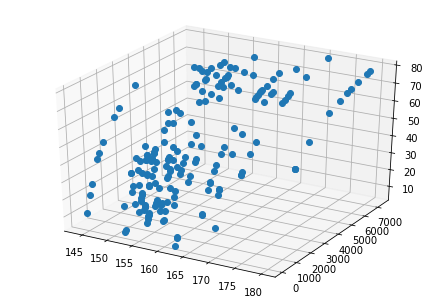

In [92]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive')

# Google スプレッドシートからデータを読み込むための認証
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

# グラフ表示要のライブラリ
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データ分析用のライブラリ
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import PowerTransformer

# モデルの初期化
clf = linear_model.LinearRegression()

# べき変換するための初期化
scaler = PowerTransformer()

# Google スプレッドシートからデータを読み込み
worksheet = gc.open("DefPenetration").sheet1
rows = worksheet.get_all_records()
pene = pd.DataFrame.from_records(rows)
print("スプレッドシートの内容")
print(pene)

# 読み込んだデータを3次元プロット
X = pene['level'].values
Y = pene['value'].values
Z = pene['penetration'].values
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X,Y,Z,marker="o",linestyle='None')

# 目的変数と説明変数に分ける
features = pene.drop("penetration", axis=1).values
labels = pene['penetration'].values

# テストデータを分離
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.8)

# べき変換
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 予測モデルを作成
clf.fit(x_train_scaled, y_train)

# モデル評価
predict = clf.predict(x_test_scaled)
print("\nモデル評価")
print(clf.score(x_test_scaled, y_test))

# 偏回帰係数
print("\n偏回帰係数")
print(pd.DataFrame({"Name":pene.drop("penetration", axis=1).columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
 # 切片 (誤差)
print("\n切片 (誤差)")
print(clf.intercept_)

# 手入力された値を予測
print("\nレベルと防御値を入れ、防御率を予測")
#get_value = list(map(int,input().split()))
#clf.predict(scaler.transform([get_value]))